In [43]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

print(X)
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,stratify=y,test_size=0.25)


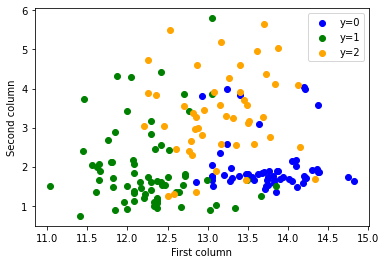

In [45]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.scatter(X[:,0][y==0],X[:,1][y==0],color='blue',label='y=0')
ax.scatter(X[:,0][y==1],X[:,1][y==1],color='green',label='y=1')
ax.scatter(X[:,0][y==2],X[:,1][y==2],color='orange',label='y=2')
ax.set_xlabel('First column')
ax.set_ylabel('Second column')
ax.legend()
plt.show()

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [47]:
training_acc = tree_model.score(X_train,Y_train)
print("Training accuracy of decision tree classifer is {:.4f}".format(training_acc))
testing_acc = tree_model.score(X_test,Y_test)
print("Testing accuracy of decision tree classifer is {:.4f}".format(testing_acc))

Training accuracy of decision tree classifer is 1.0000
Testing accuracy of decision tree classifer is 0.9556


In [48]:
from sklearn.metrics import precision_recall_fscore_support as prf
precision , recall , fscore, _ = prf(Y_test, tree_model.predict(X_test),average='macro')
print("Precision {:.4f}, Recall {:.4f}, and F1 score {:.4f}".format(precision, recall, fscore))

Precision 0.9524, Recall 0.9630, and F1 score 0.9548


/Users/saharsoltanmohammadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

<Figure size 720x432 with 0 Axes>

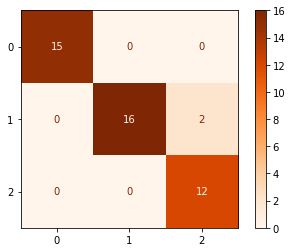

In [49]:
from sklearn.metrics import plot_confusion_matrix
fig = plt.figure(figsize=(10,6))
plot_confusion_matrix(tree_model,X_test,Y_test, cmap=plt.cm.Oranges, display_labels=[0,1])
plt.title("Confusion matrix of Decision tree")
plt.show()